In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import sklearn
import os
import sys
import time
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

2.3.1
sys.version_info(major=3, minor=6, micro=7, releaselevel='final', serial=0)
matplotlib 3.3.2
numpy 1.18.4
pandas 1.1.4
sklearn 0.23.2
tensorflow 2.3.1
tensorflow.keras 2.4.0


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(xtrain_all, ytrain_all), (xtest, ytest) = fashion_mnist.load_data()
xvalid, xtrain = xtrain_all[:5000], xtrain_all[5000:]
yvalid, ytrain = ytrain_all[:5000], ytrain_all[5000:]

print(xvalid.shape, yvalid.shape)
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


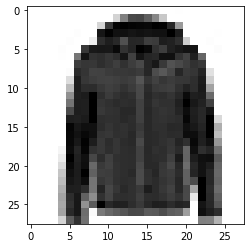

In [3]:
def show_single_image(img_arr):
    plt.imshow(img_arr, cmap="binary")
    plt.show()
    
show_single_image(xtrain[0])

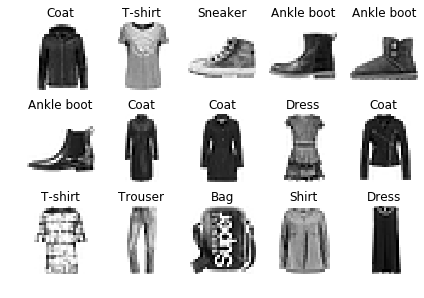

In [5]:
def show_imgs(n_rows, n_cols, x_data, y_data, class_names):
    assert len(x_data) == len(y_data)
    assert n_rows * n_cols < len(x_data)
    plt.figure(figsize = (n_cols * 1.4, n_rows * 1.6))
    for row in range(n_rows):
        for col in range(n_cols):
            index = n_cols * row + col
            plt.subplot(n_rows, n_cols, index+1)
            plt.imshow(x_data[index], cmap="binary", interpolation="nearest")
            plt.axis("off")
            plt.title(class_names[y_data[index]])
    plt.show()

class_names = ["T-shirt", "Trouser", "Pullover", "Dress", "Coat", "Sandal",
              "Shirt", "Sneaker", "Bag", "Ankle boot"]
show_imgs(3, 5, xtrain, ytrain, class_names)

In [6]:
# 构建图
# relu: y = max(0, x)
# softmax: 将向量变成概率分布. x = [x1, x2, x3], 
#          y = [e^x1/sum, e^x2/sum, e^x3/sum], sum = e^x1 + e^x2 + e^x3

"""
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
"""

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# reason for sparse: y->index. y->one_hot->[]
# 若 y 已经是一个向量， 直接用 categorical_crossentropy
# 若 y 只是一个数字， 用 sparse_categorical_crossentropy
model.compile(loss="sparse_categorical_crossentropy",
              optimizer = keras.optimizers.SGD(0.001),
              metrics = ["accuracy"])

In [8]:
model.layers

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [13]:
# None 是样本数
# [None, 784] * W + b -> [None, 300] 
# W.shape [784, 300], b [300]
784 * 300 + 300

235500

In [10]:
history = model.fit(xtrain, ytrain, epochs=10, validation_data=(xvalid, yvalid))

Epoch 1/10
1719/1719 [==============================] - 2s 1ms/step - loss: 2.8921 - accuracy: 0.6963 - val_loss: 0.6668 - val_accuracy: 0.7766
Epoch 2/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5924 - accuracy: 0.7855 - val_loss: 0.5955 - val_accuracy: 0.7900
Epoch 3/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5193 - accuracy: 0.8068 - val_loss: 0.5529 - val_accuracy: 0.8062
Epoch 4/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4820 - accuracy: 0.8206 - val_loss: 0.5290 - val_accuracy: 0.8086
Epoch 5/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4572 - accuracy: 0.8284 - val_loss: 0.5027 - val_accuracy: 0.8212
Epoch 6/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4356 - accuracy: 0.8374 - val_loss: 0.5127 - val_accuracy: 0.8202
Epoch 7/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4192 - accuracy: 0.8435 - val_loss: 0.4909 - val_accuracy:

In [12]:
type(history) # 是一个 callback

tensorflow.python.keras.callbacks.History

In [17]:
history.history

{'loss': [2.3027027388139203,
  2.302689323494651,
  2.302687073135376,
  2.3026938714807685,
  2.3026868661013515,
  2.3026909878470683,
  2.302696921088479,
  2.302678966730291,
  2.302702622396296,
  2.302698574100841],
 'accuracy': [0.0994,
  0.098272726,
  0.099054545,
  0.09849091,
  0.09934545,
  0.09874546,
  0.099072725,
  0.10107273,
  0.098545454,
  0.09965455],
 'val_loss': [2.3434677421569825,
  2.343524264526367,
  2.3436913356781006,
  2.3436259616851807,
  2.3434855045318606,
  2.3435724487304688,
  2.343578438568115,
  2.3435940711975096,
  2.3435259231567382,
  2.343608994293213],
 'val_accuracy': [0.0914,
  0.0976,
  0.0914,
  0.0914,
  0.1002,
  0.0914,
  0.0914,
  0.0914,
  0.0914,
  0.0914]}

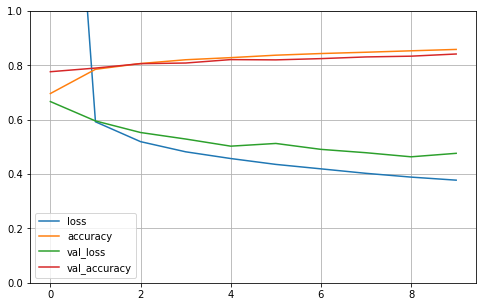

In [13]:
def plot_learning_curve(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()
    
plot_learning_curve(history)

In [15]:
model.evaluate(xtest, ytest, verbose=0)

[0.5020583271980286, 0.833899974822998]